| Technological Institute of the Philippines | Quezon City - Computer Engineering |
| --- | --- |
| **Course Code:** | CPE 313 |
| **Code Title:** | Advanced Machine Learning and Deep Learning |
| **2nd Semester** | AY 2023-2024 |
| --- | --- |
| **ASSIGMENT NO.4.1** | **Mood Detection with OpenCV** |
| **Name** | Mendoza, Paulo |
| --- | --- |
| **Section** | CPE32S8 |
| **Date Performed**: | March 22, 2023 |
| **Date Submitted**: | March 22, 2023 |
| **Instructor**: | Engr. Roman M. Richard |

# Instruction

As an introduction to computer vision, you are to perform the simple task of mood detection. Mood detection is the process of identifying and understanding a person's current emotional state. It can be done through a variety of methods, but we will focus on Facial expression recognition. Facial expressions are one of the most important cues for understanding human emotions. Mood detection systems can use computer vision techniques to analyze facial features and identify specific expressions, such as happiness, sadness, anger, you must attain the following objectives:

Recognize when a face is yours or not.

Recognize only your mood (happy, sad, angry, or confused).

Perform testing to show the performance of your implementation.

# Code

In [56]:
# This uses the camera and box the person's face

import cv2

def detect_faces():
    # Load the pre-trained face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Initialize the camera
    cap = cv2.VideoCapture(0)

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()

        # Convert the frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        print(faces)

        # Draw rectangles around the faces
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Display the resulting frame
        cv2.imshow('Face Detection', frame)

        # Break the loop when 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the capture
    cap.release()
    cv2.destroyAllWindows()

# Call the function to start face detection
detect_faces()


[[119 199 200 200]]
[[118 198 202 202]]
[[119 198 201 201]]
[[119 198 200 200]]
[[119 198 202 202]]
[[118 198 203 203]]
[[117 197 205 205]]
[[120 199 200 200]]
[[119 200 199 199]]
[[119 199 202 202]]
[[119 199 200 200]]
[[120 198 203 203]]
[[120 199 200 200]]
[[119 199 200 200]]
[[120 200 198 198]]
[[119 199 199 199]]
[[121 199 198 198]]
[[121 199 197 197]]
[[121 199 198 198]]
[[122 199 196 196]]
[[122 199 196 196]]
[[120 198 198 198]]
[[120 198 198 198]]
[[120 198 198 198]]
[[120 197 200 200]]
[[120 197 199 199]]
[[120 197 198 198]]
[[120 197 199 199]]
[[122 198 197 197]]
[[121 197 197 197]]
[[121 199 198 198]]
[[120 198 198 198]]
[[119 197 199 199]]
[[121 199 197 197]]
[[121 200 196 196]]
[[122 200 196 196]]
[[120 199 197 197]]
[[120 198 199 199]]
[[120 198 199 199]]
[[123 200 195 195]]
[[121 198 198 198]]
[[120 197 200 200]]
[[123 197 197 197]]
[[121 198 197 197]]
[[119 195 201 201]]
[[120 198 199 199]]
[[118 198 201 201]]
[[123 202 196 196]]
[[123 202 198 198]]
[[124 203 198 198]]


In [10]:
# This trains the model to identify if the person is me 

import cv2
import os
import numpy as np

def train_face_recognition_model(data_dir):
    # Initialize LBPH Face Recognizer
    recognizer = cv2.face.LBPHFaceRecognizer_create()

    # Prepare training data
    faces = []
    labels = []

    # Iterate through each subdirectory in the data directory
    for person_name in os.listdir(data_dir):
        person_path = os.path.join(data_dir, person_name)
        if not os.path.isdir(person_path):
            continue

        # Iterate through each image file in the subdirectory
        for filename in os.listdir(person_path):
            img_path = os.path.join(person_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
            if img is None:
                continue

            faces.append(img)
            labels.append(person_name)  # Assigning label based on subdirectory name

    # Assign unique integer labels to each person
    label_dict = {label: idx for idx, label in enumerate(np.unique(labels))}
    labels = [label_dict[label] for label in labels]

    # Train the recognizer
    recognizer.train(faces, np.array(labels))

    # Save the trained model
    recognizer.save("face_recognition_model.xml")

    print("Face recognition model trained and saved successfully.")

# Provide the directory containing the training data (each person's images in separate subdirectories)
train_face_recognition_model(r"D:\data sci\resources\rowImages")



Face recognition model trained and saved successfully.


In [48]:
# This combines the camera that boxes a face and the model I made that recognises the face if the confidence is less than 70 then it is me. 
# Less is better in CascadeClassifier

import cv2

def detect_and_recognize_face():
    # Load the pre-trained face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Load the LBPH face recognizer
    recognizer = cv2.face.LBPHFaceRecognizer_create()
    recognizer.read(r"D:\data sci\data sci 3/face_recognition_model.xml")  # Load your trained face recognition model

    # Initialize the camera
    cap = cv2.VideoCapture(0)

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()

        # Convert the frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Draw rectangles around the detected faces and recognize them
        for (x, y, w, h) in faces:
            # Recognize the face
            roi_gray = gray[y:y+h, x:x+w]
            id_, confidence = recognizer.predict(roi_gray)

            # If recognized face belongs to you (adjust confidence threshold as needed)
            if confidence < 70:
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
                label_text = f"You (ID: {id_}, Confidence: {confidence:.2f})"
                cv2.putText(frame, label_text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
            else:
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
                label_text = f"Unknown (ID: {id_}, Confidence: {confidence:.2f})"
                cv2.putText(frame, label_text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

            # Print ID and confidence
            print(f"ID: {id_}, Confidence: {confidence:.2f}")

        # Display the resulting frame
        cv2.imshow('Face Detection and Recognition', frame)

        # Break the loop when 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the capture
    cap.release()
    cv2.destroyAllWindows()

# Call the function to start face detection and recognition
detect_and_recognize_face()


ID: 2, Confidence: 89.37
ID: 3, Confidence: 68.62
ID: 2, Confidence: 88.85
ID: 2, Confidence: 69.11
ID: 2, Confidence: 91.21
ID: 2, Confidence: 69.34
ID: 2, Confidence: 92.40
ID: 2, Confidence: 69.29
ID: 2, Confidence: 89.50
ID: 2, Confidence: 67.31
ID: 2, Confidence: 91.83
ID: 2, Confidence: 67.61
ID: 2, Confidence: 93.58
ID: 2, Confidence: 66.40
ID: 2, Confidence: 92.58
ID: 2, Confidence: 67.09
ID: 2, Confidence: 91.90
ID: 2, Confidence: 65.42
ID: 2, Confidence: 91.62
ID: 2, Confidence: 63.89
ID: 2, Confidence: 92.56
ID: 2, Confidence: 67.03
ID: 2, Confidence: 92.89
ID: 2, Confidence: 67.93
ID: 2, Confidence: 93.77
ID: 2, Confidence: 67.04
ID: 2, Confidence: 93.05
ID: 2, Confidence: 68.60
ID: 2, Confidence: 92.81
ID: 2, Confidence: 68.20
ID: 2, Confidence: 91.17
ID: 2, Confidence: 69.81
ID: 2, Confidence: 92.12
ID: 2, Confidence: 66.75
ID: 2, Confidence: 93.56
ID: 2, Confidence: 68.68
ID: 2, Confidence: 90.38
ID: 2, Confidence: 68.02
ID: 2, Confidence: 92.13
ID: 2, Confidence: 67.98


In [41]:
# This uses the camera to gether picture and save it in a folder hold the 1,2,3,4 button to capture the corresponding emotion
# each emotion have it's own folder

import cv2
import os

# Emotions to collect
emotions = ["happy", "sad", "angry", "confused"]

# Directory to save the collected images
data_dir = "emotion_data"

# Create directories for each emotion if they don't exist
for emotion in emotions:
    os.makedirs(os.path.join(data_dir, emotion), exist_ok=True)

# Load the pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Initialize the camera
cap = cv2.VideoCapture(0)

# Function to capture images for training data
def capture_images():
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()

        # Convert the frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Draw rectangles around the detected faces
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

            # Crop the face region
            face_roi = gray[y:y+h, x:x+w]

            # Resize cropped face to 255x255
            resized_face = cv2.resize(face_roi, (255, 255))

            # Display the cropped face
            cv2.imshow('Cropped Face', resized_face)

            # Check for key press to save the cropped face
            key = cv2.waitKey(1) & 0xFF
            if key in range(ord('1'), ord('1') + len(emotions)):
                emotion_idx = key - ord('1')
                emotion = emotions[emotion_idx]
                save_image(resized_face, emotion)
                print(f"Image saved for emotion: {emotion}")
            elif key == ord('q'):
                break

        # Display the resulting frame
        cv2.imshow('Capture', frame)

        # Break the loop when 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the camera11
    cap.release()
    cv2.destroyAllWindows()

# Function to save the captured image
def save_image(frame, emotion):
    filename = f"{emotion}_{len(os.listdir(os.path.join(data_dir, emotion))) + 1}.jpg"
    filepath = os.path.join(data_dir, emotion, filename)
    cv2.imwrite(filepath, frame)

# Start capturing images
capture_images()


Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image saved for emotion: happy
Image sa

In [42]:
# This access the folder with emotion pictures and convert it into X and y arrays to be used for training the model later

import os
import cv2
import numpy as np

# Define the directory containing the image data
data_dir = "emotion_data"

# Define the list of emotion labels
emotions = ["happy", "sad", "angry", "confused"]

# Initialize empty lists to store the images and labels
X = []  # Images
y = []  # Labels

# Iterate through each emotion folder
for label, emotion in enumerate(emotions):
    emotion_dir = os.path.join(data_dir, emotion)
    # Iterate through each image in the emotion folder
    for img_name in os.listdir(emotion_dir):
        img_path = os.path.join(emotion_dir, img_name)
        # Read the image and convert it to grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to a common size (e.g., 100x100)
        img = cv2.resize(img, (100, 100))
        # Append the image and its label to the lists
        X.append(img)
        y.append(label)

# Convert the lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Check the shape of the data
print("Shape of X:", X.shape)  # (num_samples, height, width)
print("Shape of y:", y.shape)  # (num_samples,)


Shape of X: (400, 100, 100)
Shape of y: (400,)


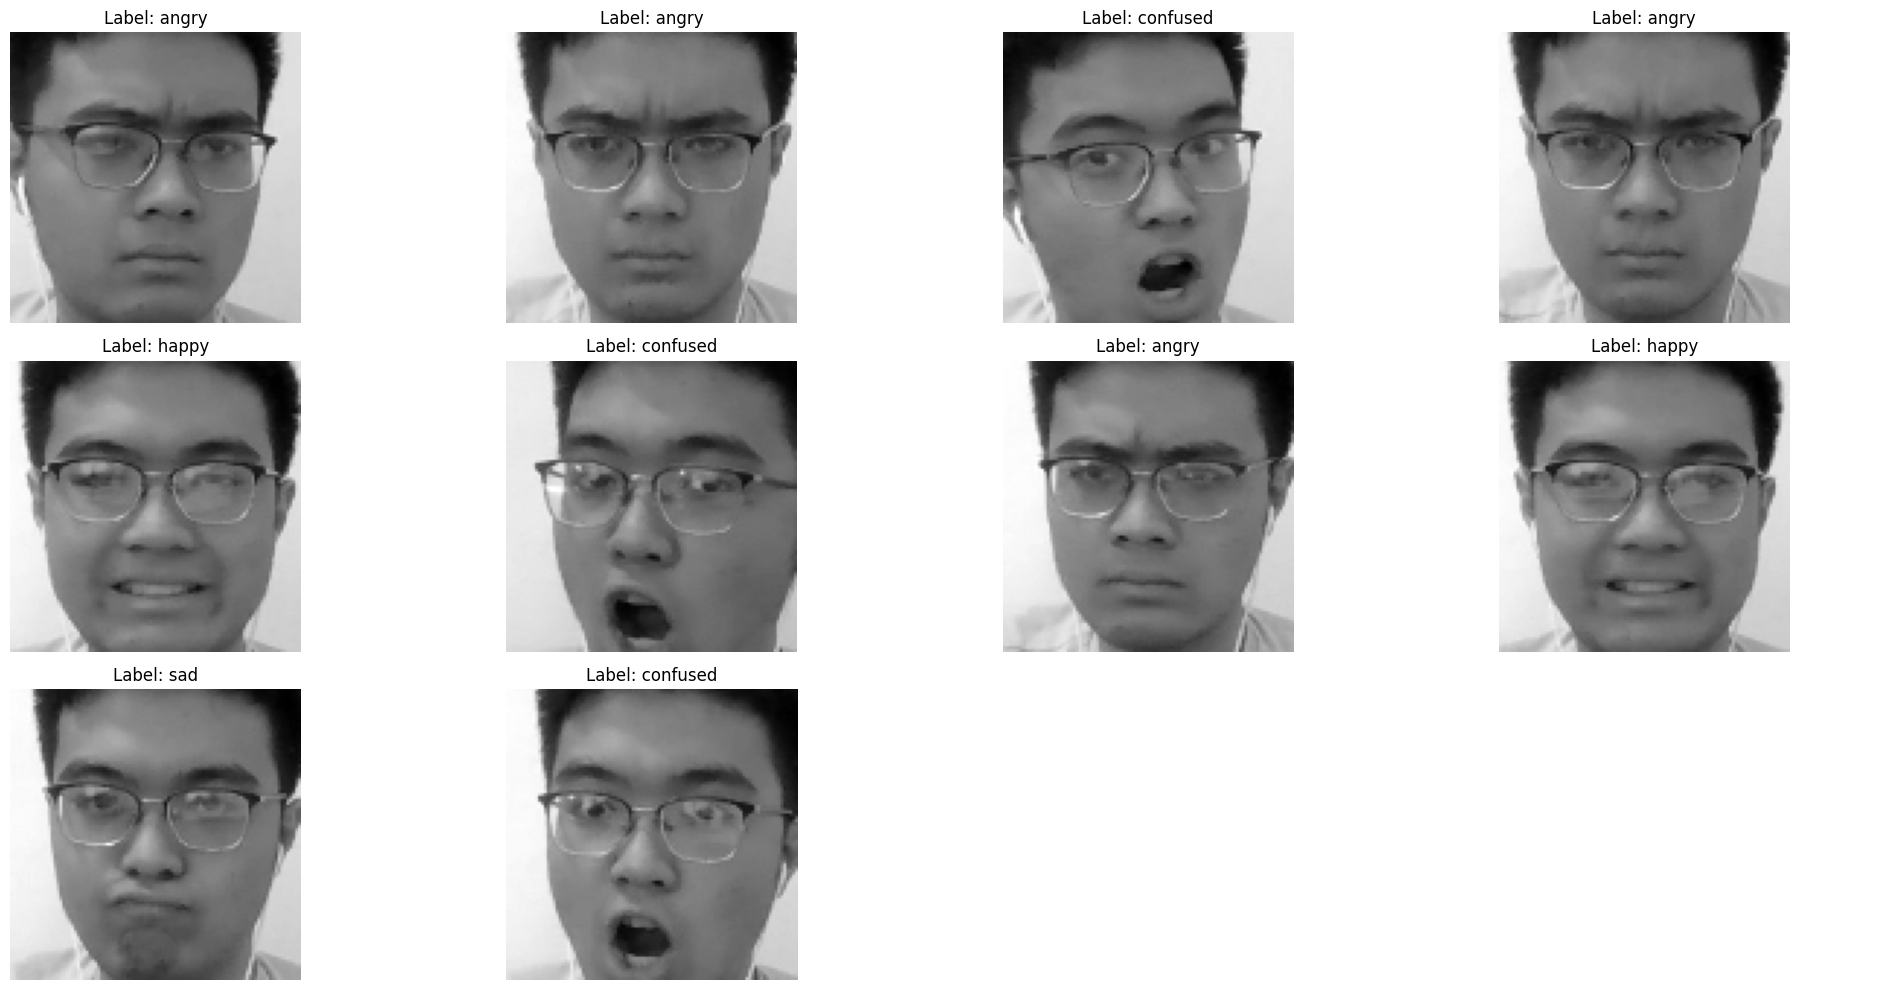

In [44]:
# This displays the captured image with it's label 

import numpy as np
import matplotlib.pyplot as plt

import numpy as np

# Sample X and y data
num_samples = 10
random_indices = np.random.choice(len(X), num_samples, replace=False)

X_sample = [X[i] for i in random_indices]
y_sample = [y[i] for i in random_indices]


emotions = ["happy", "sad", "angry", "confused"]

# Calculate the number of rows and columns for subplots
num_images = 10
num_cols = 4  # Number of columns
num_rows = (num_images + num_cols - 1) // num_cols  # Round up to the nearest integer

# Plot the images with their corresponding labels
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))  # Adjust the figsize parameter to make the images larger

# Flatten the axes array if necessary
if isinstance(axes, np.ndarray):
    axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < num_images:
        ax.imshow(X_sample[i], cmap='gray')
        ax.set_title(f"Label: {emotions[y_sample[i]]}")
        ax.axis('off')
    else:
        ax.axis('off')  # Hide empty subplots

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


In [45]:
# making a cnn model using the data from above

import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming X is your image data and y is the corresponding labels

# Reshape X to match input shape of CNN (add channel dimension)
X = X.reshape(-1, 100, 100, 1)  # Assuming images are 100x100 and grayscale

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')  # Assuming 4 emotions
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Save the model
model.save('emotion_detection_model.h5')


Epoch 1/10
13/13 [==============================] - 5s 233ms/step - loss: 27.3761 - accuracy: 0.2850 - val_loss: 1.1320 - val_accuracy: 0.5000
Epoch 2/10
13/13 [==============================] - 3s 205ms/step - loss: 0.8303 - accuracy: 0.6375 - val_loss: 0.4234 - val_accuracy: 0.8125
Epoch 3/10
13/13 [==============================] - 3s 204ms/step - loss: 0.2690 - accuracy: 0.9275 - val_loss: 0.2454 - val_accuracy: 0.8625
Epoch 4/10
13/13 [==============================] - 3s 203ms/step - loss: 0.1137 - accuracy: 0.9775 - val_loss: 0.0298 - val_accuracy: 1.0000
Epoch 5/10
13/13 [==============================] - 3s 206ms/step - loss: 0.0438 - accuracy: 0.9900 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 3s 208ms/step - loss: 0.0389 - accuracy: 0.9925 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 3s 205ms/step - loss: 0.0329 - accuracy: 0.9900 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch

In [51]:
# This opens a camera and predict the emotion 

import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the model
model = load_model('emotion_detection_model.h5')

# Load the pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Initialize the camera
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw rectangles around the detected faces and recognize them
    for (x, y, w, h) in faces:
        # Crop the face region
        face_roi = gray[y:y+h, x:x+w]
        face_roi_resized = cv2.resize(face_roi, (100, 100))  # Resize the face region to match model input size


        
        # Reshape the image for model input (add batch dimension)
        face_input = np.expand_dims(face_roi_resized, axis=0)
        face_input = np.expand_dims(face_input, axis=-1)  # Add channel dimension

        # Perform emotion recognition
        predictions = model.predict(face_input)
        emotion_label = np.argmax(predictions)

        # Define label text based on emotion
        emotion_labels = ["Happy", "Sad", "Angry", "Confused"]
        label_text = f"Emotion: {emotion_labels[emotion_label]}"

        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Display emotion label above the face rectangle
        cv2.putText(frame, label_text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display the resulting frame
    cv2.imshow('Emotion Detection', frame)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 16ms/step


In [58]:
# This is the finish output
# We have model total of 3 models
# model for detecting where is the face, it makes a box around the face
# model for detecting is this face me, the box is green if it's me and red if not
# model for detecting what is the emotion, the text is displayed alongside the box on what is the emotoin

import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the emotion detection model
model = load_model('emotion_detection_model.h5')

# Load the face cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the LBPH face recognizer
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read(r"D:\data sci\data sci 3/face_recognition_model.xml")  # Load your trained face recognition model 

# Initialize the camera
cap = cv2.VideoCapture(0)

# Function to detect and recognize faces
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw rectangles around the detected faces and recognize them
    for (x, y, w, h) in faces:
        # Crop the face region
        face_roi = gray[y:y+h, x:x+w]
        face_roi_resized = cv2.resize(face_roi, (100, 100))  # Resize the face region to match model input size

        # Reshape the image for model input (add batch and channel dimensions)
        face_input = np.expand_dims(face_roi_resized, axis=0)
        face_input = np.expand_dims(face_input, axis=-1)

        # Perform face recognition
        id_, confidence = recognizer.predict(face_roi)

        # Define label text and color based on face recognition result
        if confidence < 70:
            label_text = "You"
            box_color = (0, 255, 0)  # Green color for recognized face
        else:
            label_text = "Unknown"
            box_color = (0, 0, 255)  # Red color for unrecognized face

        # Perform emotion recognition
        predictions = model.predict(face_input)
        emotion_label = np.argmax(predictions)
        emotion_labels = ["Happy", "Sad", "Angry", "Confused"]
        emotion_text = emotion_labels[emotion_label]

        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), box_color, 2)

        # Display labels above the face rectangle
        cv2.putText(frame, f"{label_text} - {emotion_text}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, box_color, 2)

    # Display the resulting frame
    cv2.imshow('Emotion Detection', frame)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 17ms/step


# Sample Output

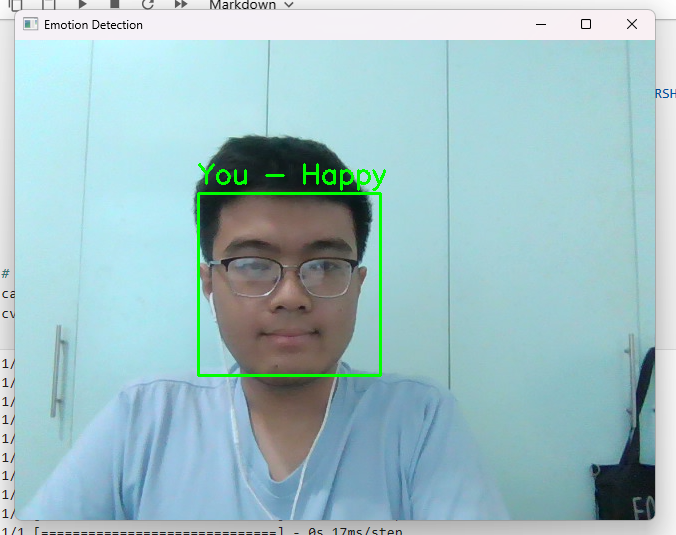

# Explanation of the steps 

1. I made a code that opens a window and boxes the face of the person using "cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')".
2. Using the data I have from previous activity I have a picture of myself and classmates on my row. I made a multiclassification model in  "cv2.face.LBPHFaceRecognizer_create()".
3. I combined the detection of the face and model from step 2 so that is the confidence is less than 70 it will make the box green and red if not.
4. I made a code so that using the camera and is I press a number key"(1:"happy", 2:"sad", 3:"angry", 4:"confused")" it will save a 100x100 image that is greyscaled to a folder depending on what key is pressed.
5. I made a code access the folder with emotion pictures and save it into X and y converted into arrays to be used for training the model later 6. I made a code that displayed entries in X and y it displayed the image and it's corresponding emotion.7. I used the X and y data to create a CNN model to know what emotion is presented. 8. I made a code that opens the camera then detect the face and identify what emotion is it using the models and code from previous steps.
9. This is the finish output, I compile all my knowledge and code from previous step to create a Code that opens a window then detect a face it makes a box around the face. Then tells if it is me the box is green if it's me and red if not. Then display what the emotion is.ox on what is the emotoin

# Conclusion

I was able to complete the task very good. Because The resulting output was performing as what was asked. It was able use camera feed and display that feed in a window. Then box the face, then if the face is me the box is color green and red if not, then it displays the text on what emotion is displayed. This was a good activity and I used a step by step approach be knowing what do I need to make this happen, then make those things and verif each part if it works then finally combine those things to create the desired output.

# Github Link:

https://github.com/Abyza/CPE313/tree/main/ASS_4_1_Mood_Detection_with_OpenCV